## This is Student Performance prediction project
we are going to predict based on data wheater have good performance on the behalf of given data

- Problem defination
- Data
- Evaluate  
- Features
- Modeling
- Experimantations

### 2- Data
We have data and uploaded it already


### 3- Evaluate
 In initial stage we need to make sure our accuracy is above 90%



### 4- Features
what features are imporatant and what features columns what means

Variables:

    - Hours Studied: The total number of hours spent studying by each students.
  
    - Previous Scores: The scores obtained by students in previous tests.

    - Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

    - Sleep Hours: The average number of hours of sleep the student had per day. 

    - Sample Question Papers Practiced: The number of sample question papers the student practiced.

    - Target Variables: 
    - Performance Index: A measure of the overall performance of each students.The performance index represents the student'academic    
      performance and  has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better
      performance.
ormance.



## Tools Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import Modules of sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

#Import evaluation libraries
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score



### Exploring Data initial stage
- what proble i am going to solve
- what kind of data i have
- does this data have missing values
- are there any outlier,sporious vector
- can we add or remove some of the features

In [2]:
df = pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
#Check NAN values

df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# Datatypes

df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

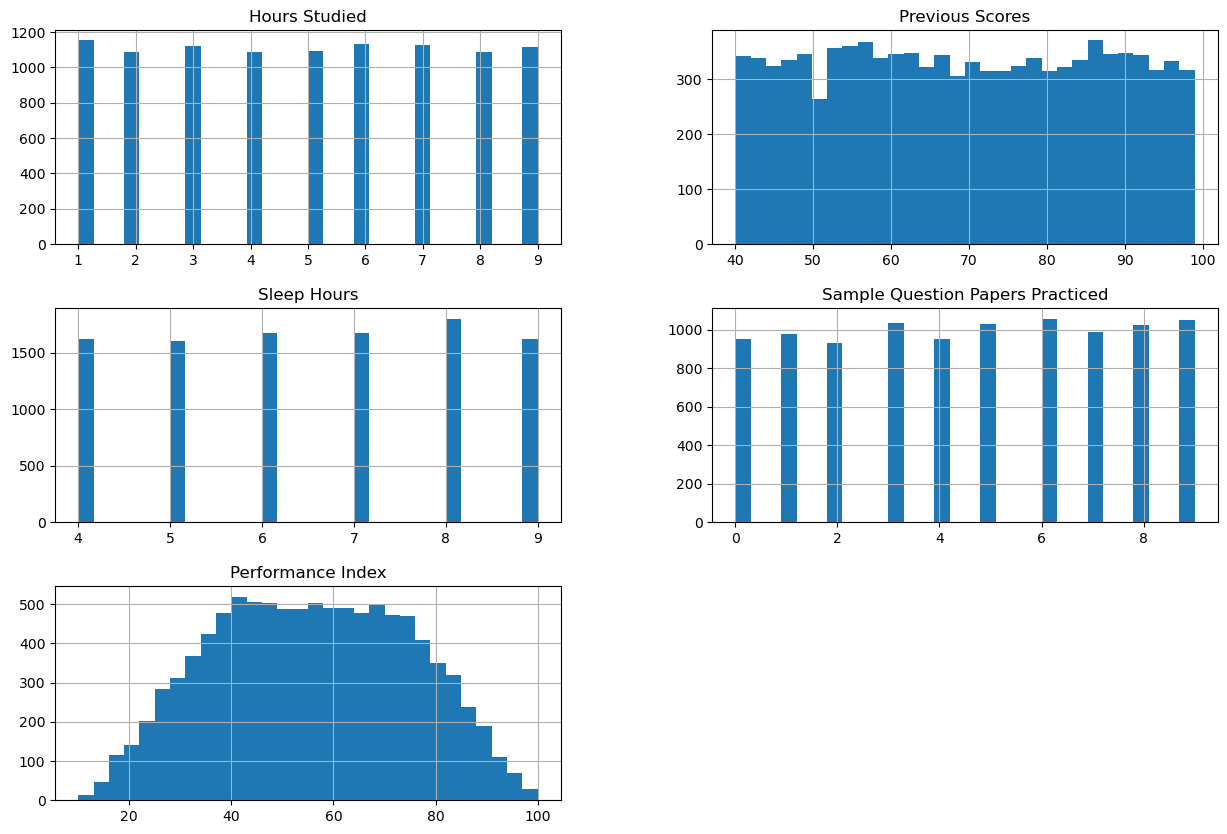

In [8]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [9]:
pd.crosstab(df["Performance Index"],df["Hours Studied"])

Hours Studied,1,2,3,4,5,6,7,8,9
Performance Index,,,,,,,,,
10.0,1,0,0,0,0,0,0,0,0
11.0,4,1,0,0,0,0,0,0,0
12.0,8,0,0,0,0,0,0,0,0
13.0,8,5,0,0,0,0,0,0,0
14.0,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
96.0,0,0,0,0,0,0,1,4,9
97.0,0,0,0,0,0,0,0,5,8
98.0,0,0,0,0,0,0,0,1,6


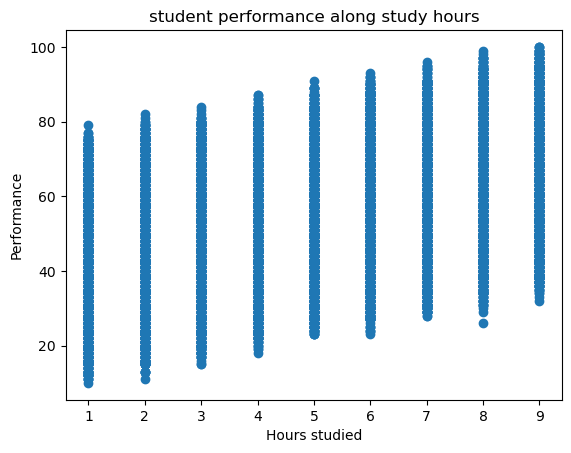

In [10]:
#Visualize performance index with hours studied

plt.scatter(df["Hours Studied"],df["Performance Index"])
plt.title("student performance along study hours")
plt.xlabel("Hours studied")
plt.ylabel("Performance")
plt.show()

In [11]:
pd.crosstab(df["Performance Index"],df["Previous Scores"])

Previous Scores,40,41,42,43,44,45,46,47,48,49,...,90,91,92,93,94,95,96,97,98,99
Performance Index,,,,,,,,,,,,,,,,,,,,,
10.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.0,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,3,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.0,6,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,7
97.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,3,7
98.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,4


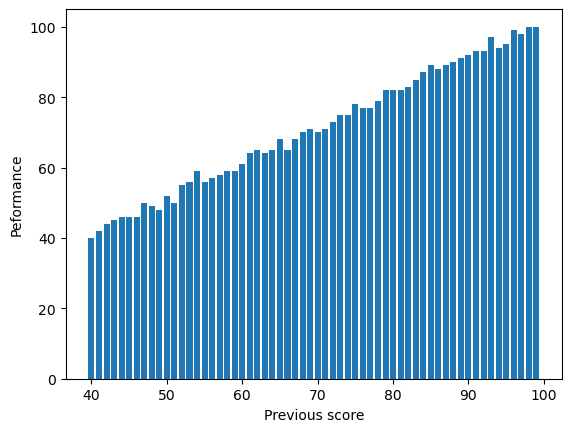

In [12]:
#Plot relationship between Previous score and Performance

plt.bar(df["Previous Scores"],df["Performance Index"])
plt.xlabel("Previous score")
plt.ylabel('Peformance')
plt.show()

### Split data into train and test

In [13]:
x = df.drop("Performance Index", axis = 1)
y = df["Performance Index"]

In [14]:
#Are data is ready for processing or not

x.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
dtype: object

In [15]:
y.dtypes

dtype('float64')

In [16]:
#Lets change data type of x

transform_x = pd.get_dummies(x)

In [17]:
transform_x.dtypes # Now data is ready for processing

Hours Studied                       int64
Previous Scores                     int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
Extracurricular Activities_No        bool
Extracurricular Activities_Yes       bool
dtype: object

In [18]:
np.random.seed(7)

x_train,x_test,y_train,y_test = train_test_split(transform_x, y, test_size = 0.2)

In [19]:
#According to our dataset we choose estimator from sklearn map

#Create instant of Ridge estimator

reg = Ridge()

#Fit model

reg.fit(x_train,y_train)

Ridge()

In [20]:
#check score

reg.score(x_test,y_test)

0.9888422676298931

In [21]:
#Use cv and check accuracy/score

reg_score = cross_val_score(reg, transform_x,y, cv= 5, scoring="r2")
reg_score = np.mean(reg_score)
reg_score


0.9887338672440308

In [22]:
print(f"We successfully get {reg_score:2f}% score using linear model")

We successfully get 0.988734% score using linear model


In [23]:
#check prediction
y_pred = reg.predict(x_test)

In [24]:
#count mean absolute error

mae = mean_absolute_error(y_test,y_pred)

In [25]:
#Lets visualize better way of mean value

df_mae = pd.DataFrame(data={"Actual Value":y_test,"Predict Value":y_pred})

df_mae["MAE_Value"] = df_mae["Actual Value"] - df_mae["Predict Value"] 

df_mae

,Actual Value,Predict Value,MAE_Value
1977,66.0,61.376073,4.623927
3880,77.0,76.502629,0.497371
52,75.0,71.587907,3.412093
2551,64.0,63.469832,0.530168
2246,62.0,63.398953,-1.398953
...,...,...,...
9505,23.0,24.204529,-1.204529
2836,57.0,56.872478,0.127522
1169,36.0,33.768290,2.231710
9929,56.0,53.916295,2.083705


In [26]:
#find mean square error

mean_squared_error(y_test,y_pred)

4.204151857350433

In [27]:
#Manually find mean square error

msq = np.square(df_mae["MAE_Value"])
msq

1977    21.380701
3880     0.247378
52      11.642378
2551     0.281078
2246     1.957068
          ...    
9505     1.450890
2836     0.016262
1169     4.980530
9929     4.341827
8486     0.006018
Name: MAE_Value, Length: 2000, dtype: float64

In [28]:
#Now use Random Forest Regressor to see score

#Create instance 
rfr = RandomForestRegressor()

#lets fit model

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
#Check score

rfr.score(x_test,y_test)

0.9854027827723498

In [30]:
rfr_score = cross_val_score(rfr, transform_x, y, cv = 5)
rfr_score_n = np.mean(rfr_score)
rfr_score_n


0.9851960380687013

In [31]:
print(f"We get {rfr_score_n:2f}% score using Random Forest Regressor")

We get 0.985196% score using Random Forest Regressor


In [32]:
#Lets use random and grid cv to tune hyperparameter

#ceate parameters in dictionary

parameters_rfr = {
    "n_estimators":[100,200,500],
    "max_depth":[10,20,30],
    "min_samples_leaf":[1,2],
    "min_samples_split":[2,4],
    "max_features":["auto","sqrt"]
}

#Using RandomSearchCV

rfr_rsc = RandomizedSearchCV(RandomForestRegressor(),
                            param_distributions=parameters_rfr,
                            n_iter=10,
                            cv=5,
                            verbose=True)


In [33]:
#Fit the model

rfr_rsc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200, 500]},
                   verbose=True)

In [34]:
rfr_rsc.score(x_test,y_test)

0.9845716684002914

In [40]:
print(f"Acuracy is {rfr_rsc.score(x_test,y_test)} using Raandom Search CV ")

Acuracy is 0.9845716684002914 using Raandom Search CV 


In [35]:
#Using GridSearchCV

rfr_grid = GridSearchCV(RandomForestRegressor(),
                       param_grid=parameters_rfr,
                       cv = 5 ,
                       verbose=True)

In [36]:
rfr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\Desktop\Housing_Price\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500]},
             verbose=True)

In [37]:
rfr_grid.score(x_test,y_test)

0.9849976656653395

In [ ]:
print(f"Acuracy is {rfr_rsc.score(x_test,y_test)} using Raandom Search CV ")

## Conclusion

* dataset has taken by kiggle and according to our evalution we set accuracy above 90% and we choose to estimators from sklearn estimator map according to our dataset.
* we successfully get 98% accuracy from both estimators.
* we try to improve our estimator to get more score by using RandomSearchCV anf GridSearchCV but we get same results.
* we analyze data and get some usefull insights from our data.
* we found that two features is more important of our data.
* 1.['Hours Studied']
* 2.['Previous Score']
* when we analyze deeply and visualize then we see these both features is more connected or related with our 'Performance Index'. 